In [1]:
from pyskl.models import build_model
from mmcv import Config
import seaborn as sns
from mmcv.runner.checkpoint import load_checkpoint

/home/trungct/miniconda3/envs/pyskl/lib/python3.7/site-packages/requests/__init__.py:114: RequestsDependencyWarning: urllib3 (2.2.1) or chardet (5.1.0)/charset_normalizer (3.1.0) doesn't match a supported version!
  RequestsDependencyWarning,


In [2]:
base = '../work_dirs/aagcn/aagcn_pyskl_ntu60_xsub_3dkp/j_0.01_random8_convnew'
config = f'{base}/j.py'
checkpoint_file = f'{base}/best_top1_acc_epoch_16.pth'
# best_top1_acc_epoch_16

In [3]:
cfg = Config.fromfile(config)
model = build_model(cfg.model)
load_checkpoint(model, checkpoint_file)

load checkpoint from local path: ../work_dirs/aagcn/aagcn_pyskl_ntu60_xsub_3dkp/j_0.01_random8_convnew/best_top1_acc_epoch_16.pth


{'meta': {'env_info': 'sys.platform: linux\nPython: 3.7.11 (default, Jul 27 2021, 14:32:16) [GCC 7.5.0]\nCUDA available: True\nGPU 0: NVIDIA A100-SXM4-40GB\nCUDA_HOME: None\nGCC: gcc (GCC) 4.8.5 20150623 (Red Hat 4.8.5-44)\nPyTorch: 1.11.0\nPyTorch compiling details: PyTorch built with:\n  - GCC 7.3\n  - C++ Version: 201402\n  - Intel(R) oneAPI Math Kernel Library Version 2021.4-Product Build 20210904 for Intel(R) 64 architecture applications\n  - Intel(R) MKL-DNN v2.5.2 (Git Hash a9302535553c73243c632ad3c4c80beec3d19a1e)\n  - OpenMP 201511 (a.k.a. OpenMP 4.5)\n  - LAPACK is enabled (usually provided by MKL)\n  - NNPACK is enabled\n  - CPU capability usage: AVX2\n  - CUDA Runtime 11.3\n  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_61,code=sm_61;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_75;-gencode;arch=compute_80,code=sm_80;-gencode;arch=compute_86

In [4]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters())
count_parameters(model)

2135482

In [5]:
for i in range(10):
    print(f"Layer {i}: {model.backbone.gcn[i].gcn.alpha.item()}")

Layer 0: -0.7824366092681885
Layer 1: 1.1450748443603516
Layer 2: 0.6594746708869934
Layer 3: -0.029470425099134445
Layer 4: 0.9986686706542969
Layer 5: 1.1184686422348022
Layer 6: -1.1749951839447021
Layer 7: -1.5620460510253906
Layer 8: 1.936335563659668
Layer 9: 0.6274350881576538


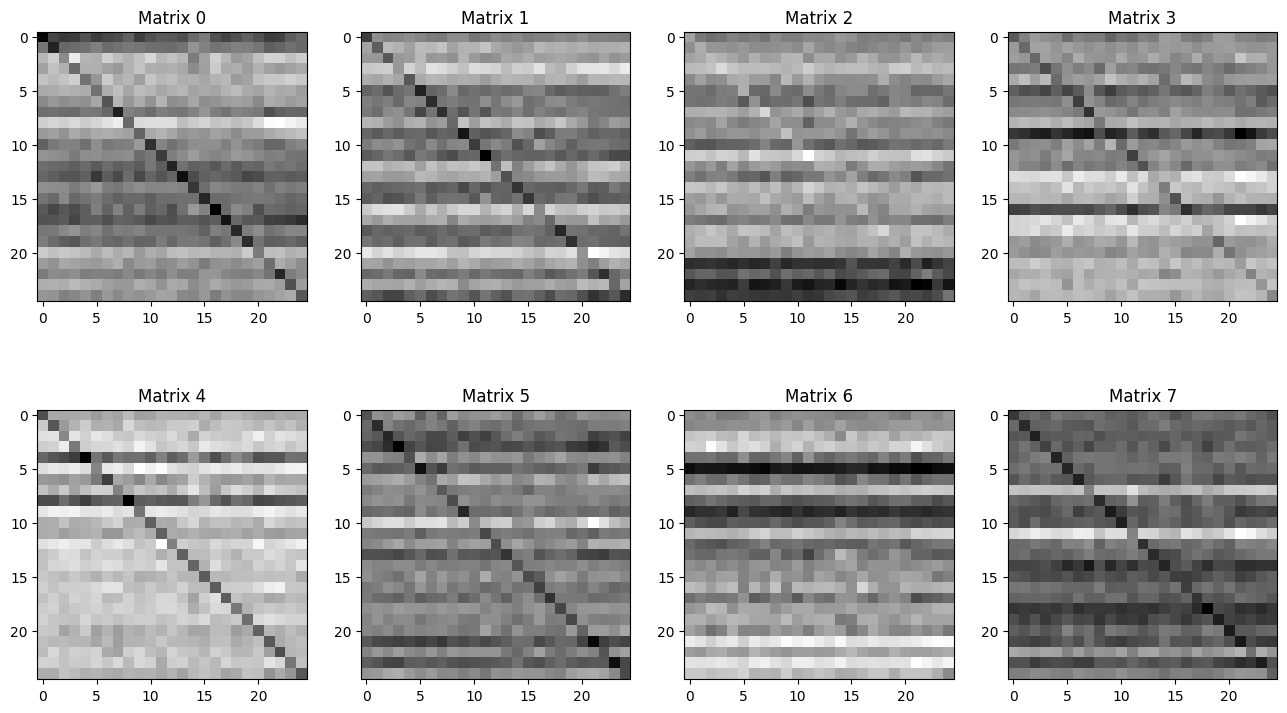

In [9]:
import matplotlib.pyplot as plt
import numpy as np

layer = 8

plt.figure(figsize=(16, 9))

for i in range(8):
    data = model.backbone.gcn[layer].gcn.A[i].detach().numpy()
    # Create a heatmap
    plt.subplot(2, 4, i + 1)
    plt.imshow(data, cmap='gray', interpolation='nearest')
    plt.title(f"Matrix {i}")

# Show the plot
plt.show()

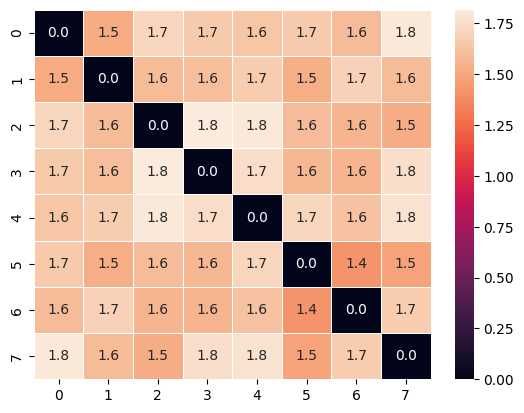

In [6]:
differences = np.empty(shape = (8, 8))
layer = 8
for i in range(8):
    for j in range(8):
        A1 = model.backbone.gcn[layer].gcn.A[i].detach().numpy()
        A2 = model.backbone.gcn[layer].gcn.A[j].detach().numpy()
        differences[i][j] = np.linalg.norm(A1 - A2)
# differences
sns.heatmap(differences, annot=True, fmt=".1f", linewidths=.5)
plt.show()

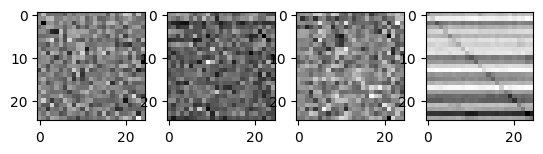

In [7]:
import matplotlib.pyplot as plt
import numpy as np


layers = [3, 5, 7, 9]
a = 0

for i in range(len(layers)):
    data = model.backbone.gcn[layers[i]].gcn.A[a].detach().numpy()
    # Create a heatmap
    plt.subplot(1, len(layers), i + 1)
    plt.imshow(data, cmap='gray', interpolation='nearest')
# Show the plot
plt.show()
